In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel("dfornek1.xlsx")
df

,Müşt. No.,Diğer,Hazine,Kart,Kredi,Maaş,Mevduat,Ödeme,Sigorta,Yaş,Müşteri Olma Yaşı,Çalışma Hacmi,Meslek
0,444,0,0,1,0,0,1,1,1,51.0,24,445162.65,İşletmeci
1,469,1,0,1,0,0,1,1,0,59.0,24,22591537.39,Mimar
2,5814,0,1,1,0,1,1,1,0,61.0,24,14473653.81,İşletmeci
3,7007,1,0,0,0,0,1,1,0,63.0,24,845728.54,İşletmeci
4,7574,1,0,1,0,0,1,1,1,51.0,24,1203252.27,İşletmeci
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,194798287,1,0,1,1,0,1,1,1,47.0,24,3913.12,Bankacı
8417,194798288,1,0,1,1,0,1,1,1,42.0,24,142641.22,Bankacı
8418,194798289,0,0,0,0,0,1,1,0,76.0,24,448769.10,Ev Hanımı
8419,197564568,1,0,1,1,0,1,1,0,52.0,24,24895.41,İşletmeci


In [3]:
df=df.replace(np.nan, 0)

In [4]:
df["Meslek"]=df["Meslek"].replace(0, "null")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8421 entries, 0 to 8420
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diğer              8421 non-null   int64  
 1   Hazine             8421 non-null   int64  
 2   Kart               8421 non-null   int64  
 3   Kredi              8421 non-null   int64  
 4   Maaş               8421 non-null   int64  
 5   Mevduat            8421 non-null   int64  
 6   Ödeme              8421 non-null   int64  
 7   Sigorta            8421 non-null   int64  
 8   Yaş                8421 non-null   float64
 9   Müşteri Olma Yaşı  8421 non-null   int64  
 10  Çalışma Hacmi      8421 non-null   float64
 11  Meslek             8421 non-null   object 
dtypes: float64(2), int64(9), object(1)
memory usage: 789.6+ KB


In [6]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=["Müşt. No."], inplace=True)

In [7]:
df["Meslek"].unique()

array(['İşletmeci', 'Mimar', 'Elektrikçi', 'Memur', 'Ev Hanımı',
       'Öğretmen', 'Bankacı', 'İşçi', 'Pazarlamacı/Satış Elemanı', 'null',
       'Mali Müşavir', 'Şoför', 'Tarım İşçisi', 'Mühendis', 'Aktar',
       'Camcı', 'Reklam ve Halkla İlişkiler', 'Berber/Kuaför', 'Sanatçı',
       'Aşçı', 'Denetçi', 'Öğrenci', 'Doktor', 'Hemşire', 'Emlakçı',
       'Muhasebeci', 'Çiftçi', 'Optik/Gözlükçü', 'Sporcu', 'Modacı',
       'Müteahhit', 'Avukat', 'Analist', 'Danışman', 'Tasarımcı',
       'Tercüman/Rehber', 'Mobilyacı', 'Asker', 'Galerici', 'Terzi',
       'Sigortacı', 'Din Görevlisi', 'Öğretim Üyesi', 'Bakkal',
       'Telefoncu/Aksesuarcı', 'Teknisyen', 'Polis', 'Güvenlik Görevlisi',
       'Manav', 'Balıkçı', 'Sanayici', 'Oto Tamircisi',
       'Hizmetli (Garson,Servis Elemanı,Temizlik Görevlisi)', 'Kurye',
       'Kuyumcu', 'Spor Eğitmeni/Antrenörü', 'Muhtar', 'Nalbur', 'Bekçi',
       'Eczacı', 'Veteriner Hekim', 'Marangoz', 'Züccaciyeci',
       'Okutman/Eğitmen', 'Antikacı', 'Ps

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Meslek = le.fit_transform(df.Meslek)


In [10]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

km = KMeans(n_clusters=4)
df_scaled = std_scale.fit_transform(df)
km.fit_predict(df_scaled)

array([1, 1, 1, ..., 1, 3, 1])

In [11]:
df["prediction"] = km.labels_
df

,Diğer,Hazine,Kart,Kredi,Maaş,Mevduat,Ödeme,Sigorta,Yaş,Müşteri Olma Yaşı,Çalışma Hacmi,Meslek,prediction
0,0,0,1,0,0,1,1,1,51.0,24,445162.65,90,1
1,1,0,1,0,0,1,1,0,59.0,24,22591537.39,44,1
2,0,1,1,0,1,1,1,0,61.0,24,14473653.81,90,1
3,1,0,0,0,0,1,1,0,63.0,24,845728.54,90,1
4,1,0,1,0,0,1,1,1,51.0,24,1203252.27,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,1,0,1,1,0,1,1,1,47.0,24,3913.12,8,3
8417,1,0,1,1,0,1,1,1,42.0,24,142641.22,8,3
8418,0,0,0,0,0,1,1,0,76.0,24,448769.10,23,1
8419,1,0,1,1,0,1,1,0,52.0,24,24895.41,90,3


In [12]:
df.prediction.value_counts()

0    5813
1    2229
2     276
3     103
Name: prediction, dtype: int64

In [24]:
df.groupby('prediction').mean()

,Diğer,Hazine,Kart,Kredi,Maaş,Mevduat,Ödeme,Sigorta,Yaş,Müşteri Olma Yaşı,Çalışma Hacmi,Meslek
prediction,,,,,,,,,,,,
0,0.006709,0.000000,0.003957,0.0,0.000000,0.118011,0.017203,0.005161,60.350077,23.388096,12888.815596,76.353862
1,0.214446,0.139973,0.631225,0.0,0.146703,0.950202,0.965904,0.124271,56.555406,23.378197,532834.876694,63.842979
2,0.086957,0.050725,0.231884,0.0,0.021739,0.333333,0.300725,0.036232,40.057971,7.036232,189905.005725,70.503623
3,0.271845,0.155340,0.621359,1.0,0.106796,0.834951,0.854369,0.873786,51.359223,23.019417,412515.314175,65.737864


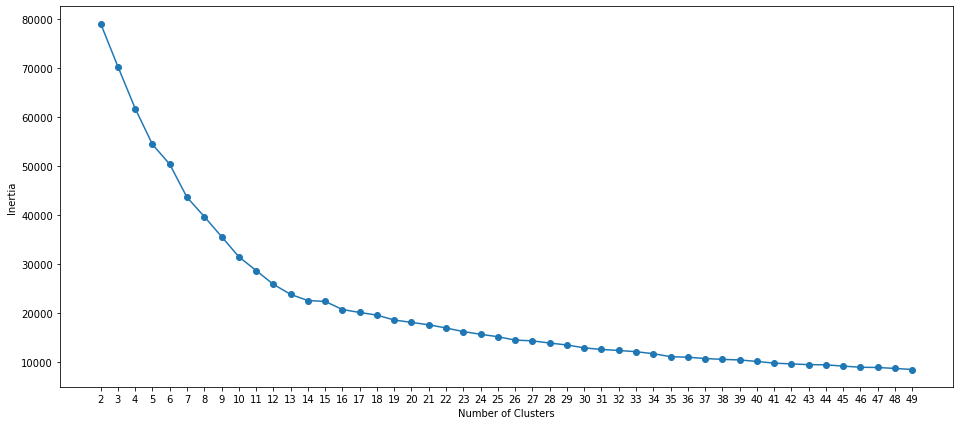

In [13]:
inertia = []
list_num_clusters = list(range(2,50))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=[16,7])
plt.plot(list_num_clusters, inertia)
plt.scatter(list_num_clusters, inertia)
plt.xticks(range(2,50))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

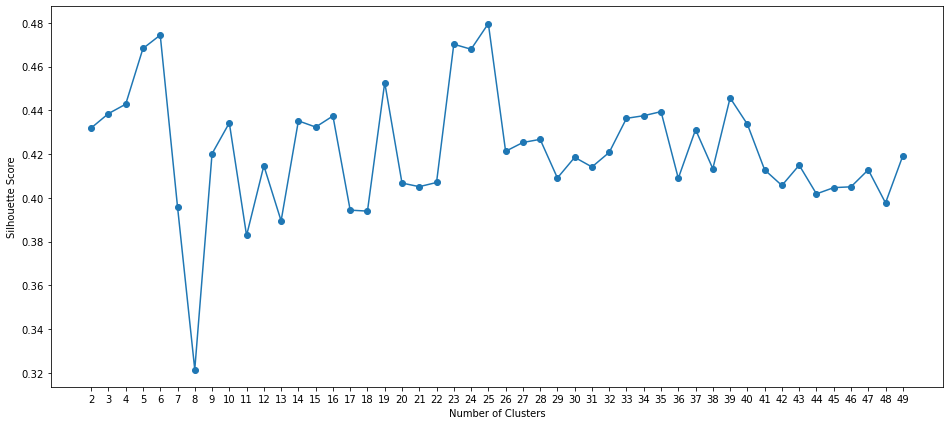

In [14]:
silhouette = []
list_num_clusters = list(range(2,50))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit_predict(df_scaled)
    silhouette.append(silhouette_score(df_scaled, km.labels_))

plt.figure(figsize=[16,7])  
plt.plot(list_num_clusters, silhouette)
plt.scatter(list_num_clusters, silhouette)
plt.xticks(range(2,50))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [15]:
df_scaled

array([[-0.26919438, -0.20574735,  2.09881072, ...,  0.39013079,
         0.15987842,  0.69470291],
       [ 3.71478781, -0.20574735,  2.09881072, ...,  0.39013079,
        12.62912496, -1.1546967 ],
       [-0.26919438,  4.86032993,  2.09881072, ...,  0.39013079,
         8.05844949,  0.69470291],
       ...,
       [-0.26919438, -0.20574735, -0.47646031, ...,  0.39013079,
         0.16190898, -1.99898783],
       [ 3.71478781, -0.20574735,  2.09881072, ...,  0.39013079,
        -0.07674793,  0.69470291],
       [-0.26919438, -0.20574735, -0.47646031, ...,  0.39013079,
        -0.09076499, -2.92368763]])

In [16]:
rf = RandomForestClassifier()
rf.fit(df_scaled, df.prediction)

RandomForestClassifier()

In [17]:
importances = pd.DataFrame({'Feature': df.iloc[:,:-1].columns, 'Importance': np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Feature').head(20)
importances

,Importance
Feature,
Ödeme,0.376
Mevduat,0.164
Çalışma Hacmi,0.116
Müşteri Olma Yaşı,0.112
Kart,0.106
Kredi,0.041
Yaş,0.023
Diğer,0.022
Meslek,0.014


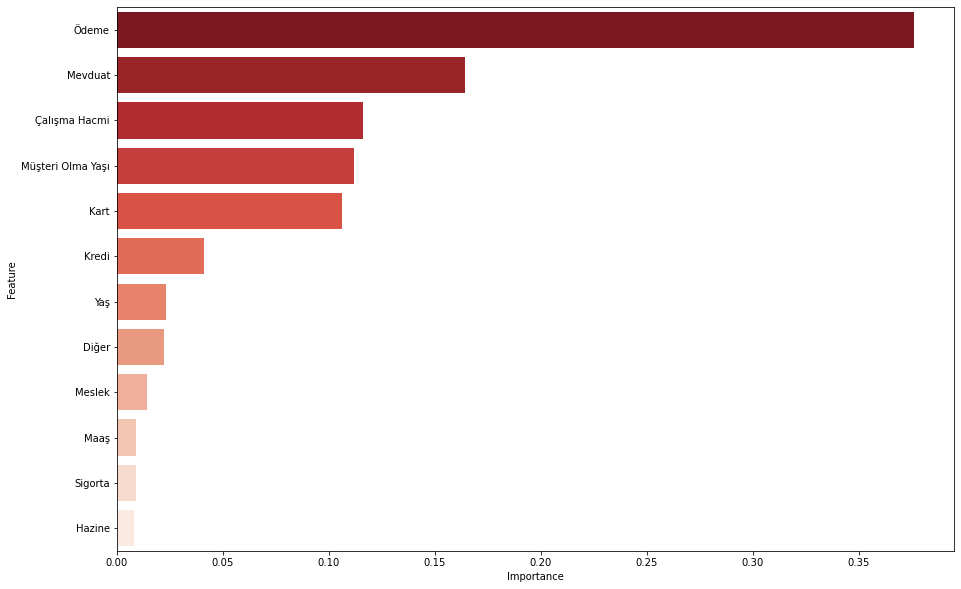

In [18]:
plt.figure(figsize=[15,10])
sns.barplot(x=importances.Importance, y=importances.index, orient='h', palette='Reds_r');

In [19]:
list=df.columns
list

Index(['Diğer', 'Hazine', 'Kart', 'Kredi', 'Maaş', 'Mevduat', 'Ödeme',
       'Sigorta', 'Yaş', 'Müşteri Olma Yaşı', 'Çalışma Hacmi', 'Meslek',
       'prediction'],
      dtype='object')

In [21]:
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

ModuleNotFoundError: No module named 'termcolor'

C:\Users\ABDULS~1.ONA\AppData\Local\Temp/ipykernel_8900/2897483805.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,


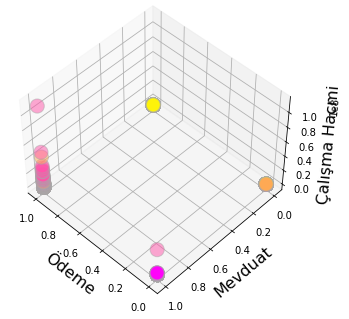

In [23]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(df['Ödeme'], df['Mevduat'], df['Çalışma Hacmi'], 
           c = df['prediction'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Ödeme', 
              fontsize = 16)
ax.set_ylabel('Mevduat', 
              fontsize = 16)
ax.set_zlabel('Çalışma Hacmi', 
              fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()

In [ ]:
'Accent', 'Accent_r', 
'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r',
'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 
'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [108]:
!pip install termcolor
from termcolor import colored as cl

count    8421.000000
mean       58.570597
std        13.756032
min         0.000000
25%        49.000000
50%        57.000000
75%        67.000000
max       107.000000
Name: Yaş, dtype: float64


C:\Users\abdulsamet.onay\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


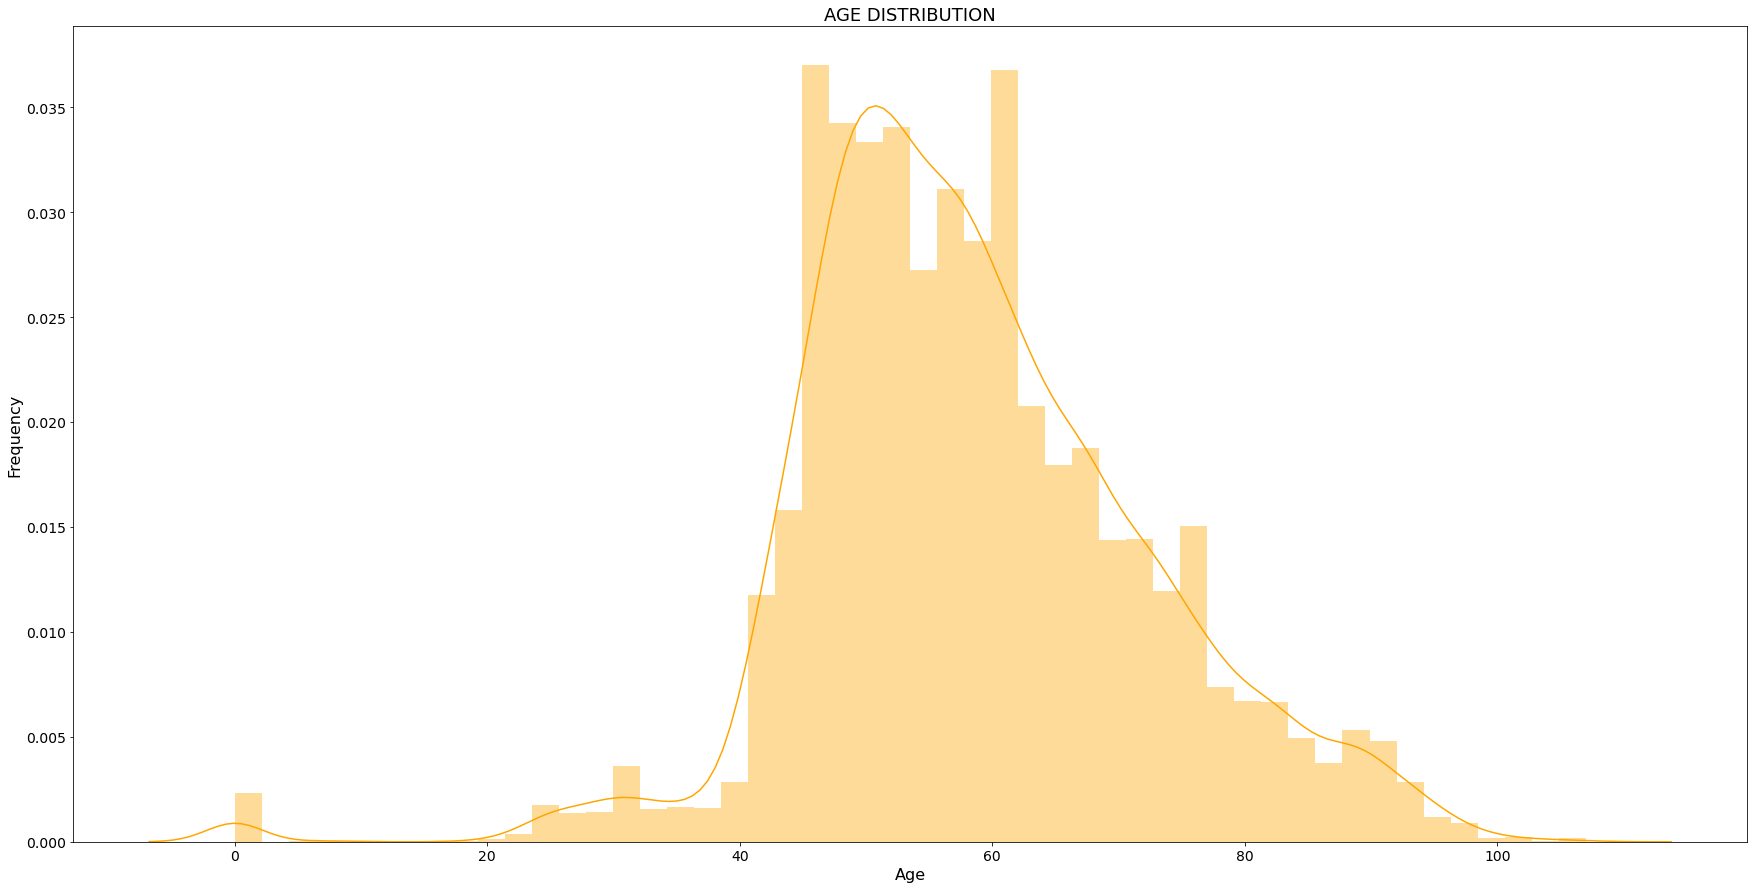

In [109]:
# Age distribution

print(cl(df['Yaş'].describe(), attrs = ['bold']))

sb.distplot(df['Yaş'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

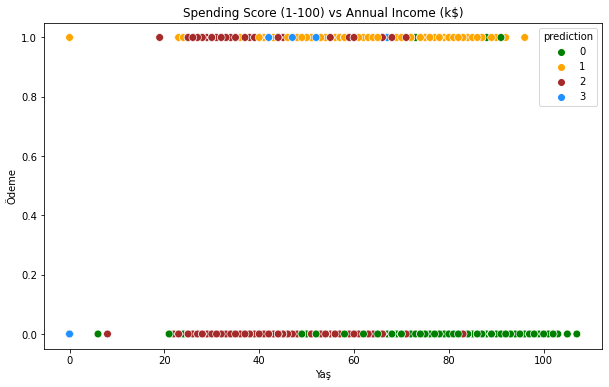

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Yaş',y = 'Ödeme',hue="prediction",
                palette=['green','orange','brown','dodgerblue'], legend='full',data = df  ,s = 60 )
plt.xlabel('Yaş')
plt.ylabel('Ödeme') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


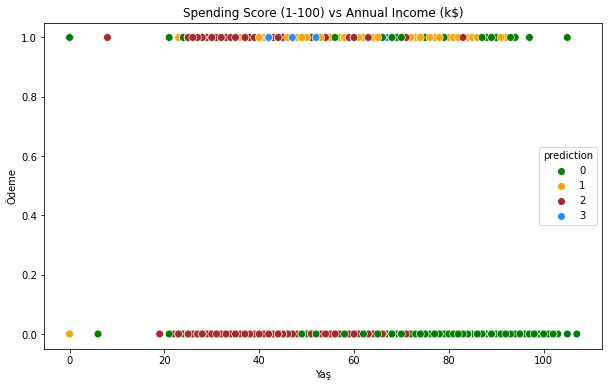

In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Yaş',y = 'Mevduat',hue="prediction",
                palette=['green','orange','brown','dodgerblue'], legend='full',data = df  ,s = 60 )
plt.xlabel('Yaş')
plt.ylabel('Ödeme') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


C:\Users\abdulsamet.onay\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


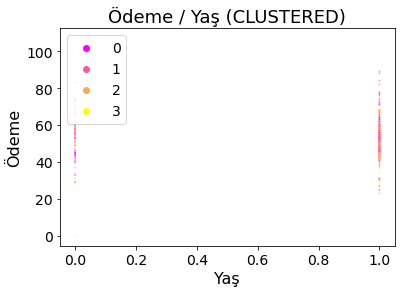

In [32]:
area = np.pi * (df.Sigorta) ** 2

sb.scatterplot('Ödeme', 'Yaş', 
               data = df, 
               s = area, 
               hue = 'prediction', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('Ödeme / Yaş (CLUSTERED)', 
          fontsize = 18)
plt.xlabel('Yaş', 
           fontsize = 16)
plt.ylabel('Ödeme', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('c_age_income.png')
plt.show()

In [33]:
df2 = pd.read_excel("dfornek1.xlsx")
df2

,Müşt. No.,Diğer,Hazine,Kart,Kredi,Maaş,Mevduat,Ödeme,Sigorta,Yaş,Müşteri Olma Yaşı,Çalışma Hacmi,Meslek
0,444,0,0,1,0,0,1,1,1,51.0,24,445162.65,İşletmeci
1,469,1,0,1,0,0,1,1,0,59.0,24,22591537.39,Mimar
2,5814,0,1,1,0,1,1,1,0,61.0,24,14473653.81,İşletmeci
3,7007,1,0,0,0,0,1,1,0,63.0,24,845728.54,İşletmeci
4,7574,1,0,1,0,0,1,1,1,51.0,24,1203252.27,İşletmeci
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,194798287,1,0,1,1,0,1,1,1,47.0,24,3913.12,Bankacı
8417,194798288,1,0,1,1,0,1,1,1,42.0,24,142641.22,Bankacı
8418,194798289,0,0,0,0,0,1,1,0,76.0,24,448769.10,Ev Hanımı
8419,197564568,1,0,1,1,0,1,1,0,52.0,24,24895.41,İşletmeci


In [42]:
df2=df2.replace(np.nan, 0)

In [43]:
df2["Meslek"]=df2["Meslek"].replace(0, "null")

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2.Meslek = le.fit_transform(df2.Meslek)

In [46]:
km = KMeans(n_clusters=4)
df2_scaled = std_scale.fit_transform(df2)
km.fit_predict(df2_scaled)

array([2, 2, 1, ..., 2, 3, 2])

In [47]:
df2["prediction"] = km.labels_
df2

,Müşt. No.,Diğer,Hazine,Kart,Kredi,Maaş,Mevduat,Ödeme,Sigorta,Yaş,Müşteri Olma Yaşı,Çalışma Hacmi,Meslek,prediction
0,444,0,0,1,0,0,1,1,1,51.0,24,445162.65,90,2
1,469,1,0,1,0,0,1,1,0,59.0,24,22591537.39,44,2
2,5814,0,1,1,0,1,1,1,0,61.0,24,14473653.81,90,1
3,7007,1,0,0,0,0,1,1,0,63.0,24,845728.54,90,2
4,7574,1,0,1,0,0,1,1,1,51.0,24,1203252.27,90,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,194798287,1,0,1,1,0,1,1,1,47.0,24,3913.12,8,3
8417,194798288,1,0,1,1,0,1,1,1,42.0,24,142641.22,8,3
8418,194798289,0,0,0,0,0,1,1,0,76.0,24,448769.10,23,2
8419,197564568,1,0,1,1,0,1,1,0,52.0,24,24895.41,90,3


In [93]:
area = np.pi * (df2.Kart) ** 2

sb.scatterplot('Yaş', 'Meslek', 
               data = df2, 
               s = area, 
               hue = 'prediction', 
               palette = 'Green', 
               alpha = 0.1, 
               edgecolor = 'darkgrey')
plt.title('Ödeme / Yaş (CLUSTERED)', 
          fontsize = 16)
plt.xlabel('Yaş', 
           fontsize = 16)
plt.ylabel('Meslek', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.rcParams['figure.figsize'] = [30, 15]
plt.lay

#plt.savefig('c_age_income.png')
plt.show()


C:\Users\abdulsamet.onay\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Green is not a valid palette name

0       51.0
1       59.0
2       61.0
3       63.0
4       51.0
        ... 
8416    47.0
8417    42.0
8418    76.0
8419    52.0
8420     0.0
Name: Yaş, Length: 8421, dtype: float64